0.6 10 15 0.333333 2.09075e-20 3.375e-07 100.0
[0.00000000e+00 1.79227978e-10 3.58469375e-10 ... 5.98999996e-01
 5.98999996e-01 5.98999996e-01]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


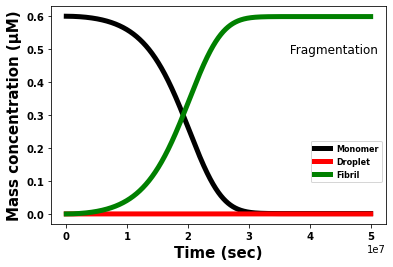

40 10 15 0.333333 2.09075e-20 3.375e-07 100.0
[0.00000000e+00 2.38368759e-06 4.52468920e-06 ... 3.99314908e+01
 3.99314908e+01 3.99314909e+01]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


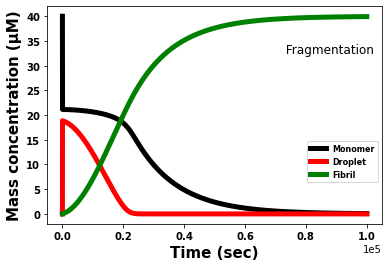

80 10 15 0.333333 2.09075e-20 3.375e-07 100.0
[0.00000000e+00 5.46057264e-06 1.07357554e-05 ... 7.99989673e+01
 7.99989673e+01 7.99989673e+01]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


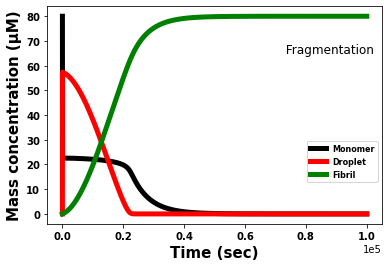

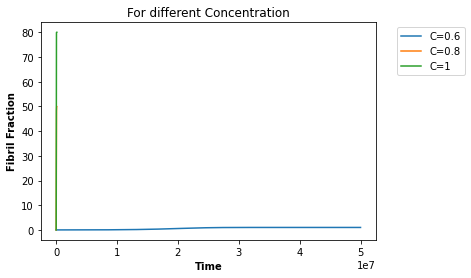

IndexError: list index out of range

In [2]:
###### nf variation
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import ScalarFormatter
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
plt.close('all')

n=12
t50_alla=[]
fibril_alla=[]
Y0_alla=[]

## for different Nf values
for nf in [4]:
    #p = [0Kdd-,1B,2Nd,3Nf1,4Nf2,5rho,6min_conc_fibril, 7Kor,8deltaG1,9Kf1-,10Kf2-,11Kfrag,12deltaG2] #
    p0=[10,30, 15, nf, nf, 20000, 0.001, 10**(-8), -7, 10**(-7),10**(-7),10**(-9),-7]
    
    y1=[0.6,0,0,0,0,0,0,0];y2=[0.8,0,0,0,0,0,0,0];y3=[1,0,0,0,0,0,0,0];y4=[2,0,0,0,0,0,0,0];y5=[4,0,0,0,0,0,0,0];y6=[8,0,0,0,0,0,0,0];y7=[10,0,0,0,0,0,0,0];
    y8=[20,0,0,0,0,0,0,0];y9=[40,0,0,0,0,0,0,0];y10=[80,0,0,0,0,0,0,0];y11=[100,0,0,0,0,0,0,0];y12=[200,0,0,0,0,0,0,0];
    
    x16=5*10**7
    x15=2*10**7
    x14=4*10**6
    x13=1*10**5
    tend=[x16,x16,x16,x15,x15,x14,x14,x14,x13,x13,x13,x13]
    
    #Define when the fragmentation ends 
    def Fragmentation(x,y,z):
        if y==0:
            out=1
        elif x/y < z:
            out=0
        else:
            out=1
        return out
    

    fibril1a=[]
    time1a=[]
    
    #C_d,[n_d] are normalized by K_md*y0[0]**Nd, denoted as Kmd_norm
    def func0(t, u):
        du = [0,0,0,0,0,0,0,0]
        AAA= (u[0]/y0[0])**p[2]
        AA=  p[2]*AAA
        BB=  (p[0]/p[1]*u[0] - p[0])*u[1] 
        BBB= (p[0]/p[1]*u[0] + p[0])*u[5]
        CC=  p[0]*(p[2]-1)*u[5]
        CCC= p[0]* u[5]
        CF1d= u[3]#min(u[3],Kmd_norm  *u[1])
        CF1m= u[3]*(1-u[2]/y0[0])#max(u[3] - Kmd_norm *u[1],0)
    
        DD=  p[3]*Kdf1*(u[2]/k1)*(np.exp(p[8])*p[5])**p[3]; # Fibril mass nucleation in the droplets
        DDD= Kdf1*(u[2]/k1)*(np.exp(p[8])*p[5])**p[3]; # Fibril number nucleation in the droplets
        EE=  p[3]*Kdf2*(np.exp(p[12])*u[0])**p[3];#Fibril mass nucleation in the solution
        EEE= Kdf2*(np.exp(p[12])*u[0])**p[3]; #Fibril number nucleation in the solution
        FF= (Kf1p*p[5]-p[9])*CF1d *u[2]/y0[0]; ##Growth and shrinking of the fibril in the droplets (Kf1p*p[5]-p[9])* DF1*u[2]/y0[0]
        FF1= (Kf2p*u[0]-p[10])*CF1m;
        FFF= (Kf1p*p[5]-p[9])*CF1d*u[1]/y0[0] + p[3]*Kdf1*(np.exp(p[8])*p[5])**p[3]*u[1]/k1; ##Growth and shrinking of the fibril in the droplets
        FFFF= (Kf1p*p[5]-p[9])*CF1d*u[5]/y0[0] + p[3]*Kdf1*(np.exp(p[8])*p[5])**p[3]*u[5]/k1; ##Growth and shrinking of the fibril in the droplets (Kf2p*u[0]-p[10])*DF2*u[2]/y0[0]
        GG= (Kf2p*u[0]-p[10])*u[4];  #Growth and shrinking of the fibril in the solution   
        # Secondary Nucleation
        HH= 0  #secondary mass nucleation in the droplets
        HHH= 0 #secondary number nucleation in the droplets
        II= 0#p[4]*Kdf2*u[7]*(np.exp(p[12])*u[0])**p[4] ## secondary mass nucleation in the solution
        III= 0#Kdf2*u[7]*(np.exp(p[12])*u[0])**p[4] ## secondary number nucleation in the solution  
        ## Fragmentation
        JJ1= p[11]*u[6]*Fragmentation(u[6],u[3],p[3])
        JJ2= p[11]*u[7]*Fragmentation(u[7],u[4],p[3])
        
        sigma= u[0]/p[1]
        kdeno= np.log(sigma)*(1-p[2]*np.log(sigma))
        knum= 2- p[2]*np.log(sigma)
        if u[0]>p[1]:
            KK=0
            KKK=0
        else:
            KK= (EE+GG+FF1+II)/u[0]*(u[1]/kdeno)
            KKK= (EE+GG+FF1+II)/u[0]*(u[5]*knum/kdeno)
        
       
        du[0] =  -(AA + BB - CC)*Kmd_norm    - EE - GG - FF1 -II                   
        du[1] =   AAA - CCC - FFF - KK
        du[2] = (AA + BB - CC)*Kmd_norm  - DD - FF -HH
        du[3] = DDD + JJ1 + HHH 
        du[4] = EEE + JJ2 + III
        du[6] = DD  + FF + FF1 + HH 
        du[7] = EE  + GG + II 
        kt=(p[0]+p[0]*u[0]/p[1])*t
        if u[0] < p[1]:
            BBBB = u[0]/p[1] *(1-np.exp(-kt))
        else:
            BBBB = (1-np.exp(-kt))
        du[5]=  AAA - BBB + p[0]* u[5]* BBBB - FFFF- KKK
        if u[2] > 0 and u[0]< p[1] and 1000*u[3] > Kmd_norm *u[1] and du[2]/u[2]< -0.000000001: 
            #print(u[0],u[1],u[2],u[3],u[4],u[5],t)
            #La =  p[2]* np.log((1 + u[0])/p[1])
            #Nm = -p[2]*(La*(La-2)+2)/((1-La)*La)
            Kdf= du[2]/u[2]
            du[5]=Kdf*u[5] + (knum/kdeno)*u[5]*du[0]/u[0]
            du[1]=Kdf*u[1] + (1/kdeno)*u[1]*du[0]/u[0]
        #if t>10**(1):
            #print(u[1]/u[0], u[3]/p[5], AA+BB-CC, AA, BB, CC, FF, GG, t)
            #print(du[0],du[1],du[2],du[3],du[4],du[5],t)
            #print(u[0],u[1],u[2],u[3],u[4],u[5],t)
            #print(AAA,CCC,t)
        return du
    
    #C_d,[n_d] are normalized by K_md*B**Nd, which equals to Kdd_*B
    def func1(t, u):
        du = [0,0,0,0,0,0,0,0]
        AAA= (u[0]/p[1])**p[2]
        AA=  p[2]*AAA
        BB=  (p[0]/p[1]*u[0] - p[0])*u[1] 
        BBB= (p[0]/p[1]*u[0] + p[0])*u[5]
        CC=  p[0]*(p[2]-1)*u[5]
        CCC= p[0]* u[5]
        CF1d= u[3]#min(u[3],Kmd_norm  *u[1])
        CF1m= u[3]*(1-u[2]/y0[0])#max(u[3] - Kmd_norm *u[1],0)
           
        DD=  p[3]*Kdf1*(u[2]/k1)*(np.exp(p[8])*p[5])**p[3]; # Fibril mass nucleation in the droplets
        DDD= Kdf1*(u[2]/k1)*(np.exp(p[8])*p[5])**p[3]; # Fibril number nucleation in the droplets
        EE=  p[3]*Kdf2*(np.exp(p[12])*u[0])**p[3];#Fibril mass nucleation in the solution
        EEE= Kdf2*(np.exp(p[12])*u[0])**p[3]; #Fibril number nucleation in the solution
        FF= (Kf1p*p[5]-p[9])*CF1d *u[2]/y0[0]; ##Growth and shrinking of the fibril in the droplets (Kf1p*p[5]-p[9])* DF1*u[2]/y0[0]
        FF1= (Kf2p*u[0]-p[10])*CF1m;
        FFF= (Kf1p*p[5]-p[9])*CF1d*u[1]/y0[0] + p[3]*Kdf1*(np.exp(p[8])*p[5])**p[3]*u[1]/k1; ##Growth and shrinking of the fibril in the droplets
        FFFF= (Kf1p*p[5]-p[9])*CF1d*u[5]/y0[0] + p[3]*Kdf1*(np.exp(p[8])*p[5])**p[3]*u[5]/k1; ##Growth and shrinking of the fibril in the droplets (Kf2p*u[0]-p[10])*DF2*u[2]/y0[0]
        GG= (Kf2p*u[0]-p[10])*u[4];  # #Growth and shrinking of the fibril in the solution   
        # Secondary Nucleation
        HH= 0  #secondary mass nucleation in the droplets
        HHH= 0 #secondary number nucleation in the droplets
        II= 0#p[4]*Kdf2*u[7]*(np.exp(p[12])*u[0])**p[4] ## secondary mass nucleation in the solution
        III= 0#Kdf2*u[7]*(np.exp(p[12])*u[0])**p[4] ## secondary number nucleation in the solution  
        ## Fragmentation
        JJ1= p[11]*u[6]*Fragmentation(u[6],u[3],p[3])
        JJ2= p[11]*u[7]*Fragmentation(u[7],u[4],p[3])
        
        sigma= u[0]/p[1]
        #knum= (sigma*(p[2]-1))**2+sigma*(-2*p[2]**2+2*p[2]+1)+p[2]**2
        #kdeno= (1-sigma)*(sigma+p[2]-sigma*p[2])
        kdeno= np.log(sigma)*(1-p[2]*np.log(sigma))
        knum= 2- p[2]*np.log(sigma)
        if u[0]>p[1]:
            KK=0
            KKK=0
        else:
            #KKK= (EE+GG+II+FF1)/u[0]*u[5]*(knum/kdeno -p[2])
            #KK= (EE+GG+II+FF1)/u[0]*(knum/kdeno - p[2] + u[0]/(p[1]-u[0]))*u[1]
            KK= (EE+GG+II+FF1)/u[0]*(u[1]/kdeno)
            KKK= (EE+GG+II+FF1)/u[0]*(u[5]*knum/kdeno)
        
        du[0] = -(AA + BB - CC)*p[0]*p[1]   - EE - GG - FF1 -II                   
        du[1] =   AAA - CCC - FFF - KK
        du[2] = (AA + BB - CC)* p[0]*p[1]  - DD - FF -HH
        du[3] = DDD + JJ1 + HHH 
        du[4] = EEE + JJ2 + III
        du[6] = DD  + FF + FF1 + HH 
        du[7] = EE  + GG + II 
        kt=(p[0]+p[0]*u[0]/p[1])*t
        if u[0] < p[1]:
            BBBB = u[0]/p[1] *(1-np.exp(-kt))
        else:
            BBBB = (1-np.exp(-kt))
        du[5]=  AAA - BBB + p[0]* u[5]* BBBB - FFFF - KKK
        if u[2] > 0 and u[0]< p[1] and 100*u[3]  > p[0]*p[1] *u[1] and du[2]/u[2]< -0.000000001: 
            #print(u[0],u[1],u[2],u[3],u[4],u[5],t)
            #La =  p[2]* np.log((1 + u[0])/p[1])
            #Nm = -p[2]*(La*(La-2)+2)/((1-La)*La)
            Kdf= du[2]/u[2]
            #du[5]=(Kdf - (knum/kdeno - p[2])*du[0]/u[0])*u[5]
            #du[1]=(Kdf - (knum/kdeno - p[2])*du[0]/u[0] + du[0]/(p[1]-u[0]))*u[1]
            du[5]=Kdf*u[5] + (knum/kdeno)*u[5]*du[0]/u[0]
            du[1]=Kdf*u[1] + (1/kdeno)*u[1]*du[0]/u[0]
        #if t>10**(1):
            #print(u[1]/u[0], u[3]/p[5], AA+BB-CC, AA, BB, CC, FF, GG, t)
            #print(du[0],du[1],du[2],du[3],du[4],du[5],t)
            #print(u[0],u[1],u[2],u[3],u[4],u[5],t)
            #print(AAA,CCC,t)
        return du  
    
    for i in [0,8,9]:
        y0=[y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12][i]
        p=p0   
        k1= p[5]
        Kdp= float(f"{p[0]/p[1]:.5e}") 
        Kmd= float(f"{p[0]*(1.0/p[1])**(p[2]-1):.5e}") 
        Kmd_norm = float(f"{p[0]*y0[0]*(y0[0]/p[1])**(p[2]-1):.5e}")
        Kf1p= float(f"{(p[9]*p[1]/(p[6]*p[5])):.5e}")
        Kf2p= float(f"{p[10]/p[6]:.5e}")
        Kdf1= float(f"{(Kf1p*(Kf1p/p[9])**(p[3]-2)):.5e}") 
        Kdf2= float(f"{(Kf2p*(Kf2p/p[10])**(p[3]-2)):.5e}") 
        print(y0[0], p[0], p[2], Kdp, Kmd, Kdf1, Kdf2)
        tspan = (0,tend[i])
        t_eval = np.linspace(0, tend[i],10000000)
        
        
        atol = 1e-5 # Absolute tolerance
        rtol = 1e-5  # Relative tolerance

        if y0[0]< p[1]:
            sol =solve_ivp(func0,tspan,y0, t_eval=t_eval,method='Radau',atol=atol, rtol=rtol)
        else:
            sol =solve_ivp(func1,tspan,y0, t_eval=t_eval,method='Radau',atol=atol, rtol=rtol)
            
        fibril1a.append(sol.y[6] + sol.y[7])
        time1a.append(sol.t)
        #print(sol.y[0])
        #print(sol.y[1])
        #print(sol.y[5])
        #print(sol.y[2])
        #print(sol.y[3]+sol.y[4])
        print(sol.y[6]+sol.y[7])
        #fig, axes = plt.subplots(1, 2, figsize=(8, 4))
        #plt.subplot(1, 2, 1)
        plt.plot(sol.t,sol.y[0, :],'k',linewidth = 5)
        #plt.plot(sol.t,sol.y[1, :],'y',linewidth = 5)
        plt.plot(sol.t,sol.y[2, :],'r',linewidth = 5)
        #plt.plot(sol.t,sol.y[3, :],'b',linewidth = 5)
        plt.plot(sol.t,(sol.y[6, :]+ sol.y[7, :]),'g',linewidth = 5)
        #plt.plot(sol.t,(sol.y[7, :]),'y',linewidth = 5)
        plt.ylabel('Mass concentration (\u03bcM)', fontweight = 'bold',fontsize=15)
        plt.xlabel('Time (sec)', fontweight = 'bold',fontsize=15)
        #myleg = plt.legend(['Monomer','Droplet','Fibril'],loc='upper right',prop = {'size':8,'weight':'bold'}, bbox_to_anchor=(1,0.5)) 
        plt.xticks(fontsize=10, weight='bold')
        plt.yticks(fontsize=10, weight='bold')
        myleg = plt.legend(['Monomer','Droplet','Fibril'],loc='upper right',prop = {'size':8,'weight':'bold'}, bbox_to_anchor=(1,0.4))
        plt.gca().ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        if i ==0:
            plt.text(0.85, 0.8, " Fragmentation  ", fontsize=12, ha='center', va='center', transform=plt.gca().transAxes)
            plt.savefig('figS2a_DF.eps',dpi=300)
        if i ==8:
            plt.text(0.85, 0.8, " Fragmentation  ", fontsize=12, ha='center', va='center', transform=plt.gca().transAxes)
            plt.savefig('figS2b_DF.eps',dpi=300)
        if i==9:
            plt.text(0.85, 0.8, " Fragmentation  ", fontsize=12, ha='center', va='center', transform=plt.gca().transAxes)
            plt.savefig('figS2c_DF.eps',dpi=300)
        #plt.xscale('log')
        #plt.title('Linear Scale')
        #if i==0:
            #plt.text(0.000001, 5, 'I', fontsize = 22)
        #if i==1:
            #plt.text(0.000001, 40, 'II', fontsize = 22)
        #if i==2:
            #plt.text(0.000001, 27, 'III', fontsize = 22)
        #myleg = plt.legend(['Monomer','Droplet','Fibril'],loc='upper right',prop = {'size':8,'weight':'bold'}, bbox_to_anchor=(1,1)) 
        #plt.subplot(1, 2, 2)
        #plt.plot(sol.t,sol.y[0, :],'k',linewidth = 5)
        #plt.plot(sol.t,np.sqrt(Kmd)*sol.y[1, :],'y',linewidth = 5)
        #plt.plot(sol.t,sol.y[2, :],'r',linewidth = 5)
        #plt.plot(sol.t, sol.y[3, :] ,'b',linewidth = 5)
        #plt.plot(sol.t,sol.y[4, :],'g',linewidth = 5)
        #plt.xlim(0,tend[i])
        #plt.xlabel('Time', fontweight = 'bold')
        #plt.ylabel('Mass', fontweight = 'bold')
        #plt.xscale('log')
        #plt.title('Linear Scale')
        #myleg = plt.legend(['Droplet Num','Fibril Num', 'Nd number' ],loc='upper right',prop = {'size':8,'weight':'bold'}, bbox_to_anchor=(1,1)) 
        #plt.tight_layout()
      
        plt.show()
        
    # Fibril Mass fraction vs time for different concentration 
    Y00=[0.599,0.799,0.999,1.999,3.999,7.999,9.999,19.999,39.999,79.999,99.999,199.999]
    Y0= Y00[:n]
    fibril_lista = [[element / constant_number for element in sublist] for sublist, constant_number in zip(fibril1a, Y0)]
    
    for i in range(1):
        for sublist1, sublist2 in zip(time1a, fibril_lista):
            plt.plot(sublist1, sublist2) #, marker='o', label='Data Points')
        plt.title('For different Concentration')
        plt.xlabel('Time', fontweight = 'bold')
        plt.ylabel('Fibril Fraction', fontweight = 'bold')
        plt.legend(['C=0.6','C=0.8','C=1','C=2','C=4','C=8','C=10','C=20','C=40','C=80','C=100','C=200'],bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()
        
    #Find T_Half for each concentration
    t50=[]
    fibril50=[]
    Y050=[]
    #print(fibril1[1])
    Y0=[0.6,0.8,1,2,4,8,10,20,40,80,100,200]
    for i in range(n):
        #Specified cutoff value
        cutoff_value = (Y0[i]-p[6])/2
        list_I=fibril1a[i]
        list_II=time1a[i]
        # Iterate through elements in List I
        for value_I, value_II in zip(list_I, list_II):
            if value_I >= cutoff_value:
                selected_value_I = value_I
                selected_value_II = value_II
                fibril50.append(selected_value_I)
                t50.append(selected_value_II)
                Y050.append(Y0[i])
                break  # Break out of the loop once the condition is met
    t50_alla.append(t50)
    fibril_alla.append(fibril50)
    Y0_alla.append(Y050)
    
    
#Plot the T_half vs Concentration for different Nd
for sublist1, sublist2 in zip(Y0_alla, t50_alla):
    plt.loglog(sublist1, sublist2)
    plt.ylabel('T_Half', fontweight = 'bold')
    plt.xlabel('Concentration', fontweight = 'bold')
    plt.title('For Different Nf')
    plt.legend(['nf=3','nf=4'],bbox_to_anchor=(1.05, 1), loc='upper left')
   

0.6 10 6 0.333333 4.11523e-07 3.375e-07 100.0


<ipython-input-3-75efdbbde57d>:75: RuntimeWarning: invalid value encountered in log
  kdeno= np.log(sigma)*(1-p[2]*np.log(sigma))
<ipython-input-3-75efdbbde57d>:76: RuntimeWarning: invalid value encountered in log
  knum= 2- p[2]*np.log(sigma)
<ipython-input-3-75efdbbde57d>:94: RuntimeWarning: overflow encountered in exp
  BBBB = u[0]/p[1] *(1-np.exp(-kt))


[0.00000000e+00 3.59232422e-11 7.18573240e-11 ... 8.58006062e-02
 8.58006280e-02 8.58006497e-02]


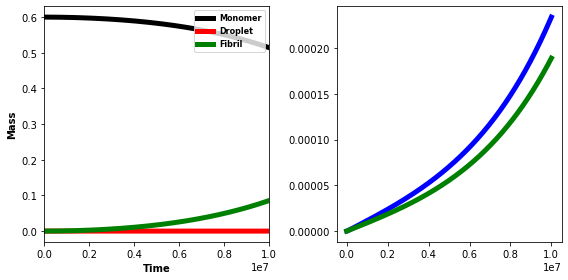

0.8 10 6 0.333333 4.11523e-07 3.375e-07 100.0


<ipython-input-3-75efdbbde57d>:75: RuntimeWarning: invalid value encountered in log
  kdeno= np.log(sigma)*(1-p[2]*np.log(sigma))
<ipython-input-3-75efdbbde57d>:76: RuntimeWarning: invalid value encountered in log
  knum= 2- p[2]*np.log(sigma)
<ipython-input-3-75efdbbde57d>:94: RuntimeWarning: overflow encountered in exp
  BBBB = u[0]/p[1] *(1-np.exp(-kt))


[0.00000000e+00 1.13731396e-10 2.27526289e-10 ... 2.99256140e-01
 2.99256215e-01 2.99256291e-01]


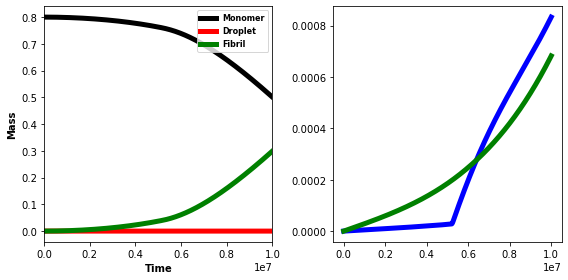

1 10 6 0.333333 4.11523e-07 3.375e-07 100.0


In [ ]:
###### nd variation
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
plt.close('all')

n=12
t50_allb=[]
fibril_allb=[]
Y0_allb=[]

## for different Nd values
for nd in [6,9,15]:
    #p = [0Kdd-,1B,2Nd,3Nf1,4Nf2,5rho,6min_conc_fibril, 7Kor,8deltaG1,9Kf1-,10Kf2-,11Kfrag,12deltaG2] #
    p0=[10**(1), 30, nd, 4, 4, 20000, 0.001, 10**(-8), -7, 10**(-7),10**(-7),10**(-9),-7]
    
    y1=[0.6,0,0,0,0,0,0,0];y2=[0.8,0,0,0,0,0,0,0];y3=[1,0,0,0,0,0,0,0];y4=[2,0,0,0,0,0,0,0];y5=[4,0,0,0,0,0,0,0];y6=[8,0,0,0,0,0,0,0];y7=[10,0,0,0,0,0,0,0];
    y8=[20,0,0,0,0,0,0,0];y9=[40,0,0,0,0,0,0,0];y10=[80,0,0,0,0,0,0,0];y11=[100,0,0,0,0,0,0,0];y12=[200,0,0,0,0,0,0,0];
    
    x16=1*10**7
    x16a=4*10**6
    x15=2*10**6
    x14=5*10**5
    x13=5*10**5
    x12=5*10**5
    x11=5*10**5
    
    #Define when the fragmentation ends 
    def Fragmentation(x,y,z):
        if y==0:
            out=1
        elif x/y < z:
            out=0
        else:
            out=1
        return out
    
    tend=[x16,x16,x16,x16,x16a,x15,x15,x15,x13,x13,x13,x13,x13,x13,x13,x12,x12,x12,x12,x12,x12,x12,x11,x11,x11,x11,x11,x11,x11,x11]
    fibril1b=[]
    time1b=[]
    
    #C_d,[n_d] are normalized by K_md*y0[0]**Nd, denoted as Kmd_norm
    def func0(t, u):
        du = [0,0,0,0,0,0,0,0]
        AAA= (u[0]/y0[0])**p[2]
        AA=  p[2]*AAA
        BB=  (p[0]/p[1]*u[0] - p[0])*u[1] 
        BBB= (p[0]/p[1]*u[0] + p[0])*u[5]
        CC=  p[0]*(p[2]-1)*u[5]
        CCC= p[0]* u[5]
        CF1d= u[3]#min(u[3],Kmd_norm  *u[1])
        CF1m= u[3]*(1-u[2]/y0[0])#max(u[3] - Kmd_norm *u[1],0)
    
        DD=  p[3]*Kdf1*(u[2]/k1)*(np.exp(p[8])*p[5])**p[3]; # Fibril mass nucleation in the droplets
        DDD= Kdf1*(u[2]/k1)*(np.exp(p[8])*p[5])**p[3]; # Fibril number nucleation in the droplets
        EE=  p[3]*Kdf2*(np.exp(p[12])*u[0])**p[3];#Fibril mass nucleation in the solution
        EEE= Kdf2*(np.exp(p[12])*u[0])**p[3]; #Fibril number nucleation in the solution
        FF= (Kf1p*p[5]-p[9])*CF1d *u[2]/y0[0]; ##Growth and shrinking of the fibril in the droplets (Kf1p*p[5]-p[9])* DF1*u[2]/y0[0]
        FF1= (Kf2p*u[0]-p[10])*CF1m;
        FFF= (Kf1p*p[5]-p[9])*CF1d*u[1]/y0[0] + p[3]*Kdf1*(np.exp(p[8])*p[5])**p[3]*u[1]/k1; ##Growth and shrinking of the fibril in the droplets
        FFFF= (Kf1p*p[5]-p[9])*CF1d*u[5]/y0[0] + p[3]*Kdf1*(np.exp(p[8])*p[5])**p[3]*u[5]/k1; ##Growth and shrinking of the fibril in the droplets (Kf2p*u[0]-p[10])*DF2*u[2]/y0[0]
        GG= (Kf2p*u[0]-p[10])*u[4];  #Growth and shrinking of the fibril in the solution   
        # Secondary Nucleation
        HH= 0  #secondary mass nucleation in the droplets
        HHH= 0 #secondary number nucleation in the droplets
        II= 0#p[4]*Kdf2*u[7]*(np.exp(p[12])*u[0])**p[4] ## secondary mass nucleation in the solution
        III= 0#Kdf2*u[7]*(np.exp(p[12])*u[0])**p[4] ## secondary number nucleation in the solution  
        ## Fragmentation
        JJ1= p[11]*u[6]*Fragmentation(u[6],u[3],p[3])
        JJ2= p[11]*u[7]*Fragmentation(u[7],u[4],p[3])
        
        sigma= u[0]/p[1]
        kdeno= np.log(sigma)*(1-p[2]*np.log(sigma))
        knum= 2- p[2]*np.log(sigma)
        if u[0]>p[1]:
            KK=0
            KKK=0
        else:
            KK= (EE+GG+FF1+II)/u[0]*(u[1]/kdeno)
            KKK= (EE+GG+FF1+II)/u[0]*(u[5]*knum/kdeno)
        
       
        du[0] =  -(AA + BB - CC)*Kmd_norm    - EE - GG - FF1 -II                   
        du[1] =   AAA - CCC - FFF - KK
        du[2] = (AA + BB - CC)*Kmd_norm  - DD - FF -HH
        du[3] = DDD + JJ1 + HHH 
        du[4] = EEE + JJ2 + III
        du[6] = DD  + FF + FF1 + HH 
        du[7] = EE  + GG + II 
        kt=(p[0]+p[0]*u[0]/p[1])*t
        if u[0] < p[1]:
            BBBB = u[0]/p[1] *(1-np.exp(-kt))
        else:
            BBBB = (1-np.exp(-kt))
        du[5]=  AAA - BBB + p[0]* u[5]* BBBB - FFFF- KKK
        if u[2] > 0 and u[0]< p[1] and 3*u[3] > Kmd_norm *u[1] and du[2]/u[2]< -0.000000001: 
            #print(u[0],u[1],u[2],u[3],u[4],u[5],t)
            #La =  p[2]* np.log((1 + u[0])/p[1])
            #Nm = -p[2]*(La*(La-2)+2)/((1-La)*La)
            Kdf= du[2]/u[2]
            du[5]=Kdf*u[5] + (knum/kdeno)*u[5]*du[0]/u[0]
            du[1]=Kdf*u[1] + (1/kdeno)*u[1]*du[0]/u[0]
        #if t>10**(1):
            #print(u[1]/u[0], u[3]/p[5], AA+BB-CC, AA, BB, CC, FF, GG, t)
            #print(du[0],du[1],du[2],du[3],du[4],du[5],t)
            #print(u[0],u[1],u[2],u[3],u[4],u[5],t)
            #print(AAA,CCC,t)
        return du
    
    #C_d,[n_d] are normalized by K_md*B**Nd, which equals to Kdd_*B
    def func1(t, u):
        du = [0,0,0,0,0,0,0,0]
        AAA= (u[0]/p[1])**p[2]
        AA=  p[2]*AAA
        BB=  (p[0]/p[1]*u[0] - p[0])*u[1] 
        BBB= (p[0]/p[1]*u[0] + p[0])*u[5]
        CC=  p[0]*(p[2]-1)*u[5]
        CCC= p[0]* u[5]
        CF1d= u[3]#min(u[3],Kmd_norm  *u[1])
        CF1m= u[3]*(1-u[2]/y0[0])#max(u[3] - Kmd_norm *u[1],0)
           
        DD=  p[3]*Kdf1*(u[2]/k1)*(np.exp(p[8])*p[5])**p[3]; # Fibril mass nucleation in the droplets
        DDD= Kdf1*(u[2]/k1)*(np.exp(p[8])*p[5])**p[3]; # Fibril number nucleation in the droplets
        EE=  p[3]*Kdf2*(np.exp(p[12])*u[0])**p[3];#Fibril mass nucleation in the solution
        EEE= Kdf2*(np.exp(p[12])*u[0])**p[3]; #Fibril number nucleation in the solution
        FF= (Kf1p*p[5]-p[9])*CF1d *u[2]/y0[0]; ##Growth and shrinking of the fibril in the droplets (Kf1p*p[5]-p[9])* DF1*u[2]/y0[0]
        FF1= (Kf2p*u[0]-p[10])*CF1m;
        FFF= (Kf1p*p[5]-p[9])*CF1d*u[1]/y0[0] + p[3]*Kdf1*(np.exp(p[8])*p[5])**p[3]*u[1]/k1; ##Growth and shrinking of the fibril in the droplets
        FFFF= (Kf1p*p[5]-p[9])*CF1d*u[5]/y0[0] + p[3]*Kdf1*(np.exp(p[8])*p[5])**p[3]*u[5]/k1; ##Growth and shrinking of the fibril in the droplets (Kf2p*u[0]-p[10])*DF2*u[2]/y0[0]
        GG= (Kf2p*u[0]-p[10])*u[4];  # #Growth and shrinking of the fibril in the solution   
        # Secondary Nucleation
        HH= 0  #secondary mass nucleation in the droplets
        HHH= 0 #secondary number nucleation in the droplets
        II= 0#p[4]*Kdf2*u[7]*(np.exp(p[12])*u[0])**p[4] ## secondary mass nucleation in the solution
        III= 0#Kdf2*u[7]*(np.exp(p[12])*u[0])**p[4] ## secondary number nucleation in the solution  
        ## Fragmentation
        JJ1= p[11]*u[6]*Fragmentation(u[6],u[3],p[3])
        JJ2= p[11]*u[7]*Fragmentation(u[7],u[4],p[3])
        
        sigma= u[0]/p[1]
        #knum= (sigma*(p[2]-1))**2+sigma*(-2*p[2]**2+2*p[2]+1)+p[2]**2
        #kdeno= (1-sigma)*(sigma+p[2]-sigma*p[2])
        kdeno= np.log(sigma)*(1-p[2]*np.log(sigma))
        knum= 2- p[2]*np.log(sigma)
        if u[0]>p[1]:
            KK=0
            KKK=0
        else:
            #KKK= (EE+GG+II+FF1)/u[0]*u[5]*(knum/kdeno -p[2])
            #KK= (EE+GG+II+FF1)/u[0]*(knum/kdeno - p[2] + u[0]/(p[1]-u[0]))*u[1]
            KK= (EE+GG+II+FF1)/u[0]*(u[1]/kdeno)
            KKK= (EE+GG+II+FF1)/u[0]*(u[5]*knum/kdeno)
        
        du[0] = -(AA + BB - CC)*p[0]*p[1]   - EE - GG - FF1 -II                   
        du[1] =   AAA - CCC - FFF - KK
        du[2] = (AA + BB - CC)* p[0]*p[1]  - DD - FF -HH
        du[3] = DDD + JJ1 + HHH 
        du[4] = EEE + JJ2 + III
        du[6] = DD  + FF + FF1 + HH 
        du[7] = EE  + GG + II 
        kt=(p[0]+p[0]*u[0]/p[1])*t
        if u[0] < p[1]:
            BBBB = u[0]/p[1] *(1-np.exp(-kt))
        else:
            BBBB = (1-np.exp(-kt))
        du[5]=  AAA - BBB + p[0]* u[5]* BBBB - FFFF - KKK
        if u[2] > 0 and u[0]< p[1] and 3*u[3]  > p[0]*p[1] *u[1] and du[2]/u[2]< -0.000000001: 
            #print(u[0],u[1],u[2],u[3],u[4],u[5],t)
            #La =  p[2]* np.log((1 + u[0])/p[1])
            #Nm = -p[2]*(La*(La-2)+2)/((1-La)*La)
            Kdf= du[2]/u[2]
            #du[5]=(Kdf - (knum/kdeno - p[2])*du[0]/u[0])*u[5]
            #du[1]=(Kdf - (knum/kdeno - p[2])*du[0]/u[0] + du[0]/(p[1]-u[0]))*u[1]
            du[5]=Kdf*u[5] + (knum/kdeno)*u[5]*du[0]/u[0]
            du[1]=Kdf*u[1] + (1/kdeno)*u[1]*du[0]/u[0]
        #if t>10**(1):
            #print(u[1]/u[0], u[3]/p[5], AA+BB-CC, AA, BB, CC, FF, GG, t)
            #print(du[0],du[1],du[2],du[3],du[4],du[5],t)
            #print(u[0],u[1],u[2],u[3],u[4],u[5],t)
            #print(AAA,CCC,t)
        return du  
    
    for i in range(12):
        y0=[y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12][i]
        p=p0   
        k1= p[5]
        Kdp= float(f"{p[0]/p[1]:.5e}") 
        Kmd= float(f"{p[0]*(1.0/p[1])**(p[2]-1):.5e}") 
        Kmd_norm = float(f"{p[0]*y0[0]*(y0[0]/p[1])**(p[2]-1):.5e}")
        Kf1p= float(f"{(p[9]*p[1]/(p[6]*p[5])):.5e}")
        Kf2p= float(f"{p[10]/p[6]:.5e}")
        Kdf1= float(f"{(Kf1p*(Kf1p/p[9])**(p[3]-2)):.5e}") 
        Kdf2= float(f"{(Kf2p*(Kf2p/p[10])**(p[3]-2)):.5e}") 
        print(y0[0], p[0], p[2], Kdp, Kmd, Kdf1, Kdf2)
        tspan = (0,tend[i])
        t_eval = np.linspace(0, tend[i],tend[i])
        if y0[0]< p[1]:
            sol =solve_ivp(func0,tspan,y0, t_eval=t_eval)
        else:
            sol =solve_ivp(func1,tspan,y0, t_eval=t_eval)
            
        fibril1b.append(sol.y[6] + sol.y[7])
        time1b.append(sol.t)
        #print(sol.y[0])
        #print(sol.y[1])
        #print(sol.y[5])
        #print(sol.y[2])
        #print(sol.y[3]+sol.y[4])
        print(sol.y[6]+sol.y[7])
        fig, axes = plt.subplots(1, 2, figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.plot(sol.t,sol.y[0, :],'k',linewidth = 5)
        #plt.plot(sol.t,sol.y[1, :],'y',linewidth = 5)
        plt.plot(sol.t,sol.y[2, :],'r',linewidth = 5)
        #plt.plot(sol.t,sol.y[3, :],'b',linewidth = 5)
        plt.plot(sol.t,(sol.y[6, :]+ sol.y[7, :]),'g',linewidth = 5)
        #plt.plot(sol.t,(sol.y[7, :]),'y',linewidth = 5)
        plt.xlim(0,tend[i])
        plt.xlabel('Time', fontweight = 'bold')
        plt.ylabel('Mass', fontweight = 'bold')
        #plt.xscale('log')
        #plt.title('Linear Scale')
        #if i==0:
            #plt.text(0.000001, 5, 'I', fontsize = 22)
        #if i==1:
            #plt.text(0.000001, 40, 'II', fontsize = 22)
        #if i==2:
            #plt.text(0.000001, 27, 'III', fontsize = 22)
        myleg = plt.legend(['Monomer','Droplet','Fibril'],loc='upper right',prop = {'size':8,'weight':'bold'}, bbox_to_anchor=(1,1)) 
        plt.subplot(1, 2, 2)
        #plt.plot(sol.t,sol.y[0, :],'k',linewidth = 5)
        #plt.plot(sol.t,np.sqrt(Kmd)*sol.y[1, :],'y',linewidth = 5)
        #plt.plot(sol.t,sol.y[2, :],'r',linewidth = 5)
        plt.plot(sol.t, sol.y[3, :] ,'b',linewidth = 5)
        plt.plot(sol.t,sol.y[4, :],'g',linewidth = 5)
        #plt.xlim(0,tend[i])
        #plt.xlabel('Time', fontweight = 'bold')
        #plt.ylabel('Mass', fontweight = 'bold')
        #plt.xscale('log')
        #plt.title('Linear Scale')
        #myleg = plt.legend(['Droplet Num','Fibril Num', 'Nd number' ],loc='upper right',prop = {'size':8,'weight':'bold'}, bbox_to_anchor=(1,1)) 
        plt.tight_layout()
        plt.show()
        
    # Fibril Mass fraction vs time for different concentration 
    Y00=[0.5,0.7,0.9,1.9,3.9,7.9,9.9,19.9,39.9,79.9,99.9,199.9]
    Y0= Y00[:n]
    fibril_listb = [[element / constant_number for element in sublist] for sublist, constant_number in zip(fibril1b, Y0)]
    
    for i in range(1):
        for sublist1, sublist2 in zip(time1b, fibril_listb):
            plt.plot(sublist1, sublist2) #, marker='o', label='Data Points')
        plt.title('For different Concentration')
        plt.xlabel('Time', fontweight = 'bold')
        plt.ylabel('Fibril Fraction', fontweight = 'bold')
        plt.legend(['C=0.6','C=0.8','C=1','C=2','C=4','C=8','C=10','C=20','C=40','C=80','C=100','C=200'],bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()
        
    #Find T_Half for each concentration
    t50=[]
    fibril50=[]
    Y050=[]
    #print(fibril1[1])
    Y0=[0.6,0.8,1,2,4,8,10,20,40,80,100,200]
    for i in range(n):
        #Specified cutoff value
        cutoff_value = (Y0[i]-p[6])/2
        list_I=fibril1b[i]
        list_II=time1b[i]
        # Iterate through elements in List I
        for value_I, value_II in zip(list_I, list_II):
            if value_I >= cutoff_value:
                selected_value_I = value_I
                selected_value_II = value_II
                fibril50.append(selected_value_I)
                t50.append(selected_value_II)
                Y050.append(Y0[i])
                break  # Break out of the loop once the condition is met
    t50_allb.append(t50)
    fibril_allb.append(fibril50)
    Y0_allb.append(Y050)
    
    
#Plot the T_half vs Concentration for different Nd
for sublist1, sublist2 in zip(Y0_allb, t50_allb):
    plt.loglog(sublist1, sublist2)
    plt.ylabel('T_Half', fontweight = 'bold')
    plt.xlabel('Concentration', fontweight = 'bold')
    plt.title('For Different Nd')
    plt.legend(['nd=6','nd=30'],bbox_to_anchor=(1.05, 1), loc='upper left')
   

In [ ]:
###### kd- variation
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
plt.close('all')

n=12
t50_allc=[]
fibril_allc=[]
Y0_allc=[]

## for different kd- values
for kdm in [10**(-3),10**(-2)]:
    #p = [0Kdd-,1B,2Nd,3Nf1,4Nf2,5rho,6min_conc_fibril, 7Kor,8deltaG1,9Kf1-,10Kf2-,11Kfrag,12deltaG2] #
    p0=[kdm, 30, 6, 4, 4, 20000, 0.1, 10**(-8), -6, 10**(-5),10**(-5),10**(-7),-6]
    
    y1=[0.6,0,0,0,0,0,0,0];y2=[0.8,0,0,0,0,0,0,0];y3=[1,0,0,0,0,0,0,0];y4=[2,0,0,0,0,0,0,0];y5=[4,0,0,0,0,0,0,0];y6=[8,0,0,0,0,0,0,0];y7=[10,0,0,0,0,0,0,0];
    y8=[20,0,0,0,0,0,0,0];y9=[40,0,0,0,0,0,0,0];y10=[80,0,0,0,0,0,0,0];y11=[100,0,0,0,0,0,0,0];y12=[200,0,0,0,0,0,0,0]
    
    x16=1*10**7
    x16a=4*10**6
    x15=2*10**6
    x14=5*10**5
    x13=5*10**5
    x12=5*10**5
    x11=5*10**5
    
    #Define when the fragmentation ends 
    def Fragmentation(x,y,z):
        if y==0:
            out=1
        elif x/y < z:
            out=0
        else:
            out=1
        return out
    
    tend=[x16,x16,x16,x16,x16a,x15,x15,x15,x13,x13,x13,x13,x13,x13,x13,x12,x12,x12,x12,x12,x12,x12,x11,x11,x11,x11,x11,x11,x11,x11]
    fibril1c=[]
    time1c=[]
    
    #C_d,[n_d] are normalized by K_md*y0[0]**Nd, denoted as Kmd_norm
    def func0(t, u):
        du = [0,0,0,0,0,0,0,0]
        AAA= (u[0]/y0[0])**p[2]
        AA=  p[2]*AAA
        BB=  (p[0]/p[1]*u[0] - p[0])*u[1] 
        BBB= (p[0]/p[1]*u[0] + p[0])*u[5]
        CC=  p[0]*(p[2]-1)*u[5]
        CCC= p[0]* u[5]
        CF1d= u[3]#min(u[3],Kmd_norm  *u[1])
        CF1m= u[3]*(1-u[2]/y0[0])#max(u[3] - Kmd_norm *u[1],0)
    
        DD=  p[3]*Kdf1*(u[2]/k1)*(np.exp(p[8])*p[5])**p[3]; # Fibril mass nucleation in the droplets
        DDD= Kdf1*(u[2]/k1)*(np.exp(p[8])*p[5])**p[3]; # Fibril number nucleation in the droplets
        EE=  p[3]*Kdf2*(np.exp(p[12])*u[0])**p[3];#Fibril mass nucleation in the solution
        EEE= Kdf2*(np.exp(p[12])*u[0])**p[3]; #Fibril number nucleation in the solution
        FF= (Kf1p*p[5]-p[9])*CF1d *u[2]/y0[0]; ##Growth and shrinking of the fibril in the droplets (Kf1p*p[5]-p[9])* DF1*u[2]/y0[0]
        FF1= (Kf2p*u[0]-p[10])*CF1m;
        FFF= (Kf1p*p[5]-p[9])*CF1d*u[1]/y0[0] + p[3]*Kdf1*(np.exp(p[8])*p[5])**p[3]*u[1]/k1; ##Growth and shrinking of the fibril in the droplets
        FFFF= (Kf1p*p[5]-p[9])*CF1d*u[5]/y0[0] + p[3]*Kdf1*(np.exp(p[8])*p[5])**p[3]*u[5]/k1; ##Growth and shrinking of the fibril in the droplets (Kf2p*u[0]-p[10])*DF2*u[2]/y0[0]
        GG= (Kf2p*u[0]-p[10])*u[4];  #Growth and shrinking of the fibril in the solution   
        # Secondary Nucleation
        HH= 0  #secondary mass nucleation in the droplets
        HHH= 0 #secondary number nucleation in the droplets
        II= 0#p[4]*Kdf2*u[7]*(np.exp(p[12])*u[0])**p[4] ## secondary mass nucleation in the solution
        III= 0#Kdf2*u[7]*(np.exp(p[12])*u[0])**p[4] ## secondary number nucleation in the solution  
        ## Fragmentation
        JJ1= p[11]*u[6]*Fragmentation(u[6],u[3],p[3])
        JJ2= p[11]*u[7]*Fragmentation(u[7],u[4],p[3])
        
        sigma= u[0]/p[1]
        kdeno= np.log(sigma)*(1-p[2]*np.log(sigma))
        knum= 2- p[2]*np.log(sigma)
        if u[0]>p[1]:
            KK=0
            KKK=0
        else:
            KK= (EE+GG+FF1+II)/u[0]*(u[1]/kdeno)
            KKK= (EE+GG+FF1+II)/u[0]*(u[5]*knum/kdeno)
        
       
        du[0] =  -(AA + BB - CC)*Kmd_norm    - EE - GG - FF1 -II                   
        du[1] =   AAA - CCC - FFF - KK
        du[2] = (AA + BB - CC)*Kmd_norm  - DD - FF -HH
        du[3] = DDD + JJ1 + HHH 
        du[4] = EEE + JJ2 + III
        du[6] = DD  + FF + FF1 + HH 
        du[7] = EE  + GG + II 
        kt=(p[0]+p[0]*u[0]/p[1])*t
        if u[0] < p[1]:
            BBBB = u[0]/p[1] *(1-np.exp(-kt))
        else:
            BBBB = (1-np.exp(-kt))
        du[5]=  AAA - BBB + p[0]* u[5]* BBBB - FFFF- KKK
        if u[2] > 0 and u[0]< p[1] and 10*u[3] > Kmd_norm *u[1] and du[2]/u[2]< -0.000000001: 
            #print(u[0],u[1],u[2],u[3],u[4],u[5],t)
            #La =  p[2]* np.log((1 + u[0])/p[1])
            #Nm = -p[2]*(La*(La-2)+2)/((1-La)*La)
            Kdf= du[2]/u[2]
            du[5]=Kdf*u[5] + (knum/kdeno)*u[5]*du[0]/u[0]
            du[1]=Kdf*u[1] + (1/kdeno)*u[1]*du[0]/u[0]
        #if t>10**(1):
            #print(u[1]/u[0], u[3]/p[5], AA+BB-CC, AA, BB, CC, FF, GG, t)
            #print(du[0],du[1],du[2],du[3],du[4],du[5],t)
            #print(u[0],u[1],u[2],u[3],u[4],u[5],t)
            #print(AAA,CCC,t)
        return du
    
    #C_d,[n_d] are normalized by K_md*B**Nd, which equals to Kdd_*B
    def func1(t, u):
        du = [0,0,0,0,0,0,0,0]
        AAA= (u[0]/p[1])**p[2]
        AA=  p[2]*AAA
        BB=  (p[0]/p[1]*u[0] - p[0])*u[1] 
        BBB= (p[0]/p[1]*u[0] + p[0])*u[5]
        CC=  p[0]*(p[2]-1)*u[5]
        CCC= p[0]* u[5]
        CF1d= u[3]#min(u[3],Kmd_norm  *u[1])
        CF1m= u[3]*(1-u[2]/y0[0])#max(u[3] - Kmd_norm *u[1],0)
           
        DD=  p[3]*Kdf1*(u[2]/k1)*(np.exp(p[8])*p[5])**p[3]; # Fibril mass nucleation in the droplets
        DDD= Kdf1*(u[2]/k1)*(np.exp(p[8])*p[5])**p[3]; # Fibril number nucleation in the droplets
        EE=  p[3]*Kdf2*(np.exp(p[12])*u[0])**p[3];#Fibril mass nucleation in the solution
        EEE= Kdf2*(np.exp(p[12])*u[0])**p[3]; #Fibril number nucleation in the solution
        FF= (Kf1p*p[5]-p[9])*CF1d *u[2]/y0[0]; ##Growth and shrinking of the fibril in the droplets (Kf1p*p[5]-p[9])* DF1*u[2]/y0[0]
        FF1= (Kf2p*u[0]-p[10])*CF1m;
        FFF= (Kf1p*p[5]-p[9])*CF1d*u[1]/y0[0] + p[3]*Kdf1*(np.exp(p[8])*p[5])**p[3]*u[1]/k1; ##Growth and shrinking of the fibril in the droplets
        FFFF= (Kf1p*p[5]-p[9])*CF1d*u[5]/y0[0] + p[3]*Kdf1*(np.exp(p[8])*p[5])**p[3]*u[5]/k1; ##Growth and shrinking of the fibril in the droplets (Kf2p*u[0]-p[10])*DF2*u[2]/y0[0]
        GG= (Kf2p*u[0]-p[10])*u[4];  # #Growth and shrinking of the fibril in the solution   
        # Secondary Nucleation
        HH= 0  #secondary mass nucleation in the droplets
        HHH= 0 #secondary number nucleation in the droplets
        II= 0#p[4]*Kdf2*u[7]*(np.exp(p[12])*u[0])**p[4] ## secondary mass nucleation in the solution
        III= 0#Kdf2*u[7]*(np.exp(p[12])*u[0])**p[4] ## secondary number nucleation in the solution  
        ## Fragmentation
        JJ1= p[11]*u[6]*Fragmentation(u[6],u[3],p[3])
        JJ2= p[11]*u[7]*Fragmentation(u[7],u[4],p[3])
        
        sigma= u[0]/p[1]
        #knum= (sigma*(p[2]-1))**2+sigma*(-2*p[2]**2+2*p[2]+1)+p[2]**2
        #kdeno= (1-sigma)*(sigma+p[2]-sigma*p[2])
        kdeno= np.log(sigma)*(1-p[2]*np.log(sigma))
        knum= 2- p[2]*np.log(sigma)
        if u[0]>p[1]:
            KK=0
            KKK=0
        else:
            #KKK= (EE+GG+II+FF1)/u[0]*u[5]*(knum/kdeno -p[2])
            #KK= (EE+GG+II+FF1)/u[0]*(knum/kdeno - p[2] + u[0]/(p[1]-u[0]))*u[1]
            KK= (EE+GG+II+FF1)/u[0]*(u[1]/kdeno)
            KKK= (EE+GG+II+FF1)/u[0]*(u[5]*knum/kdeno)
        
        du[0] = -(AA + BB - CC)*p[0]*p[1]   - EE - GG - FF1 -II                   
        du[1] =   AAA - CCC - FFF - KK
        du[2] = (AA + BB - CC)* p[0]*p[1]  - DD - FF -HH
        du[3] = DDD + JJ1 + HHH 
        du[4] = EEE + JJ2 + III
        du[6] = DD  + FF + FF1 + HH 
        du[7] = EE  + GG + II 
        kt=(p[0]+p[0]*u[0]/p[1])*t
        if u[0] < p[1]:
            BBBB = u[0]/p[1] *(1-np.exp(-kt))
        else:
            BBBB = (1-np.exp(-kt))
        du[5]=  AAA - BBB + p[0]* u[5]* BBBB - FFFF - KKK
        if u[2] > 0 and u[0]< p[1] and 10*u[3]  > p[0]*p[1] *u[1] and du[2]/u[2]< -0.000000001: 
            #print(u[0],u[1],u[2],u[3],u[4],u[5],t)
            #La =  p[2]* np.log((1 + u[0])/p[1])
            #Nm = -p[2]*(La*(La-2)+2)/((1-La)*La)
            Kdf= du[2]/u[2]
            #du[5]=(Kdf - (knum/kdeno - p[2])*du[0]/u[0])*u[5]
            #du[1]=(Kdf - (knum/kdeno - p[2])*du[0]/u[0] + du[0]/(p[1]-u[0]))*u[1]
            du[5]=Kdf*u[5] + (knum/kdeno)*u[5]*du[0]/u[0]
            du[1]=Kdf*u[1] + (1/kdeno)*u[1]*du[0]/u[0]
        #if t>10**(1):
            #print(u[1]/u[0], u[3]/p[5], AA+BB-CC, AA, BB, CC, FF, GG, t)
            #print(du[0],du[1],du[2],du[3],du[4],du[5],t)
            #print(u[0],u[1],u[2],u[3],u[4],u[5],t)
            #print(AAA,CCC,t)
        return du  
    
    for i in range(12):
        y0=[y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12][i]
        p=p0   
        k1= p[5]
        Kdp= float(f"{p[0]/p[1]:.5e}") 
        Kmd= float(f"{p[0]*(1.0/p[1])**(p[2]-1):.5e}") 
        Kmd_norm = float(f"{p[0]*y0[0]*(y0[0]/p[1])**(p[2]-1):.5e}")
        Kf1p= float(f"{(p[9]*p[1]/(p[6]*p[5])):.5e}")
        Kf2p= float(f"{p[10]/p[6]:.5e}")
        Kdf1= float(f"{(Kf1p*(Kf1p/p[9])**(p[3]-2)):.5e}") 
        Kdf2= float(f"{(Kf2p*(Kf2p/p[10])**(p[3]-2)):.5e}") 
        print(y0[0], p[0], p[2], Kdp, Kmd, Kdf1, Kdf2)
        tspan = (0,tend[i])
        t_eval = np.linspace(0, tend[i],tend[i])
        if y0[0]< p[1]:
            sol =solve_ivp(func0,tspan,y0, t_eval=t_eval)
        else:
            sol =solve_ivp(func1,tspan,y0, t_eval=t_eval)
            
        fibril1c.append(sol.y[6] + sol.y[7])
        time1c.append(sol.t)
        #print(sol.y[0])
        #print(sol.y[1])
        #print(sol.y[5])
        #print(sol.y[2])
        #print(sol.y[3]+sol.y[4])
        print(sol.y[6]+sol.y[7])
        fig, axes = plt.subplots(1, 2, figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.plot(sol.t,sol.y[0, :],'k',linewidth = 5)
        #plt.plot(sol.t,sol.y[1, :],'y',linewidth = 5)
        plt.plot(sol.t,sol.y[2, :],'r',linewidth = 5)
        #plt.plot(sol.t,sol.y[3, :],'b',linewidth = 5)
        plt.plot(sol.t,(sol.y[6, :]+ sol.y[7, :]),'g',linewidth = 5)
        #plt.plot(sol.t,(sol.y[7, :]),'y',linewidth = 5)
        plt.xlim(0,tend[i])
        plt.xlabel('Time', fontweight = 'bold')
        plt.ylabel('Mass', fontweight = 'bold')
        #plt.xscale('log')
        #plt.title('Linear Scale')
        #if i==0:
            #plt.text(0.000001, 5, 'I', fontsize = 22)
        #if i==1:
            #plt.text(0.000001, 40, 'II', fontsize = 22)
        #if i==2:
            #plt.text(0.000001, 27, 'III', fontsize = 22)
        myleg = plt.legend(['Monomer','Droplet','Fibril'],loc='upper right',prop = {'size':8,'weight':'bold'}, bbox_to_anchor=(1,1)) 
        plt.subplot(1, 2, 2)
        #plt.plot(sol.t,sol.y[0, :],'k',linewidth = 5)
        #plt.plot(sol.t,np.sqrt(Kmd)*sol.y[1, :],'y',linewidth = 5)
        #plt.plot(sol.t,sol.y[2, :],'r',linewidth = 5)
        plt.plot(sol.t, sol.y[3, :] ,'b',linewidth = 5)
        plt.plot(sol.t,sol.y[4, :],'g',linewidth = 5)
        #plt.xlim(0,tend[i])
        #plt.xlabel('Time', fontweight = 'bold')
        #plt.ylabel('Mass', fontweight = 'bold')
        #plt.xscale('log')
        #plt.title('Linear Scale')
        #myleg = plt.legend(['Droplet Num','Fibril Num', 'Nd number' ],loc='upper right',prop = {'size':8,'weight':'bold'}, bbox_to_anchor=(1,1)) 
        plt.tight_layout()
        plt.show()
        
    # Fibril Mass fraction vs time for different concentration 
    Y00=[0.5,0.7,0.9,1.9,3.9,7.9,9.9,19.9,39.9,79.9,99.9,199.9]
    Y0= Y00[:n]
    fibril_listc = [[element / constant_number for element in sublist] for sublist, constant_number in zip(fibril1c, Y0)]
    
    for i in range(1):
        for sublist1, sublist2 in zip(time1c, fibril_listc):
            plt.plot(sublist1, sublist2) #, marker='o', label='Data Points')
        plt.title('For different Concentration')
        plt.xlabel('Time', fontweight = 'bold')
        plt.ylabel('Fibril Fraction', fontweight = 'bold')
        plt.legend(['C=0.6','C=0.8','C=1','C=2','C=4','C=8','C=10','C=20','C=40','C=80','C=100','C=200'],bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()
        
    #Find T_Half for each concentration
    t50=[]
    fibril50=[]
    Y050=[]
    #print(fibril1[1])
    Y0=[0.6,0.8,1,2,4,8,10,20,40,80,100,200]
    for i in range(n):
        #Specified cutoff value
        cutoff_value = (Y0[i]-p[6])/2
        list_I=fibril1c[i]
        list_II=time1c[i]
        # Iterate through elements in List I
        for value_I, value_II in zip(list_I, list_II):
            if value_I >= cutoff_value:
                selected_value_I = value_I
                selected_value_II = value_II
                fibril50.append(selected_value_I)
                t50.append(selected_value_II)
                Y050.append(Y0[i])
                break  # Break out of the loop once the condition is met
    t50_allc.append(t50)
    fibril_allc.append(fibril50)
    Y0_allc.append(Y050)
    
    
#Plot the T_half vs Concentration for different Nd
for sublist1, sublist2 in zip(Y0_allc, t50_allc):
    plt.loglog(sublist1, sublist2)
    plt.ylabel('T_Half', fontweight = 'bold')
    plt.xlabel('Concentration', fontweight = 'bold')
    plt.title('For Different kd_')
    plt.legend(['kd_=10**(-3)','kd-=10**(-2)'],bbox_to_anchor=(1.05, 1), loc='upper left')
   

In [ ]:
###### deltaG variation
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
plt.close('all')

n=12
t50_alld=[]
fibril_alld=[]
Y0_alld=[]

## for different deltaG values
for deltaG in [5,6,7,8]:
    #p = [0Kdd-,1B,2Nd,3Nf1,4Nf2,5rho,6min_conc_fibril, 7Kor,8deltaG1,9Kf1-,10Kf2-,11Kfrag,12deltaG2] #
    p0=[10**(-2), 30, 15, 4, 4, 20000, 0.1, 10**(-8), -deltaG, 10**(-5),10**(-5),10**(-7),-6]
    
    y1=[0.6,0,0,0,0,0,0,0];y2=[0.8,0,0,0,0,0,0,0];y3=[1,0,0,0,0,0,0,0];y4=[2,0,0,0,0,0,0,0];y5=[4,0,0,0,0,0,0,0];y6=[8,0,0,0,0,0,0,0];y7=[10,0,0,0,0,0,0,0];
    y8=[20,0,0,0,0,0,0,0];y9=[40,0,0,0,0,0,0,0];y10=[80,0,0,0,0,0,0,0];y11=[100,0,0,0,0,0,0,0];y12=[200,0,0,0,0,0,0,0];
    
    x16=1*10**7
    x16a=4*10**6
    x15=2*10**6
    x14=5*10**5
    x13=5*10**5
    x12=5*10**5
    x11=5*10**5
    
    #Define when the fragmentation ends 
    def Fragmentation(x,y,z):
        if y==0:
            out=1
        elif x/y < z:
            out=0
        else:
            out=1
        return out
    
    tend=[x16,x16,x16,x16,x16a,x15,x15,x15,x13,x13,x13,x13,x13,x13,x13,x12,x12,x12,x12,x12,x12,x12,x11,x11,x11,x11,x11,x11,x11,x11]
    fibril1d=[]
    time1d=[]
    
    #C_d,[n_d] are normalized by K_md*y0[0]**Nd, denoted as Kmd_norm
    def func0(t, u):
        du = [0,0,0,0,0,0,0,0]
        AAA= (u[0]/y0[0])**p[2]
        AA=  p[2]*AAA
        BB=  (p[0]/p[1]*u[0] - p[0])*u[1] 
        BBB= (p[0]/p[1]*u[0] + p[0])*u[5]
        CC=  p[0]*(p[2]-1)*u[5]
        CCC= p[0]* u[5]
        CF1d= u[3]#min(u[3],Kmd_norm  *u[1])
        CF1m= u[3]*(1-u[2]/y0[0])#max(u[3] - Kmd_norm *u[1],0)
    
        DD=  p[3]*Kdf1*(u[2]/k1)*(np.exp(p[8])*p[5])**p[3]; # Fibril mass nucleation in the droplets
        DDD= Kdf1*(u[2]/k1)*(np.exp(p[8])*p[5])**p[3]; # Fibril number nucleation in the droplets
        EE=  p[3]*Kdf2*(np.exp(p[12])*u[0])**p[3];#Fibril mass nucleation in the solution
        EEE= Kdf2*(np.exp(p[12])*u[0])**p[3]; #Fibril number nucleation in the solution
        FF= (Kf1p*p[5]-p[9])*CF1d *u[2]/y0[0]; ##Growth and shrinking of the fibril in the droplets (Kf1p*p[5]-p[9])* DF1*u[2]/y0[0]
        FF1= (Kf2p*u[0]-p[10])*CF1m;
        FFF= (Kf1p*p[5]-p[9])*CF1d*u[1]/y0[0] + p[3]*Kdf1*(np.exp(p[8])*p[5])**p[3]*u[1]/k1; ##Growth and shrinking of the fibril in the droplets
        FFFF= (Kf1p*p[5]-p[9])*CF1d*u[5]/y0[0] + p[3]*Kdf1*(np.exp(p[8])*p[5])**p[3]*u[5]/k1; ##Growth and shrinking of the fibril in the droplets (Kf2p*u[0]-p[10])*DF2*u[2]/y0[0]
        GG= (Kf2p*u[0]-p[10])*u[4];  #Growth and shrinking of the fibril in the solution   
        # Secondary Nucleation
        HH= 0  #secondary mass nucleation in the droplets
        HHH= 0 #secondary number nucleation in the droplets
        II= 0#p[4]*Kdf2*u[7]*(np.exp(p[12])*u[0])**p[4] ## secondary mass nucleation in the solution
        III= 0#Kdf2*u[7]*(np.exp(p[12])*u[0])**p[4] ## secondary number nucleation in the solution  
        ## Fragmentation
        JJ1= p[11]*u[6]*Fragmentation(u[6],u[3],p[3])
        JJ2= p[11]*u[7]*Fragmentation(u[7],u[4],p[3])
        
        sigma= u[0]/p[1]
        kdeno= np.log(sigma)*(1-p[2]*np.log(sigma))
        knum= 2- p[2]*np.log(sigma)
        if u[0]>p[1]:
            KK=0
            KKK=0
        else:
            KK= (EE+GG+FF1+II)/u[0]*(u[1]/kdeno)
            KKK= (EE+GG+FF1+II)/u[0]*(u[5]*knum/kdeno)
        
       
        du[0] =  -(AA + BB - CC)*Kmd_norm    - EE - GG - FF1 -II                   
        du[1] =   AAA - CCC - FFF - KK
        du[2] = (AA + BB - CC)*Kmd_norm  - DD - FF -HH
        du[3] = DDD + JJ1 + HHH 
        du[4] = EEE + JJ2 + III
        du[6] = DD  + FF + FF1 + HH 
        du[7] = EE  + GG + II 
        kt=(p[0]+p[0]*u[0]/p[1])*t
        if u[0] < p[1]:
            BBBB = u[0]/p[1] *(1-np.exp(-kt))
        else:
            BBBB = (1-np.exp(-kt))
        du[5]=  AAA - BBB + p[0]* u[5]* BBBB - FFFF- KKK
        if deltaG == 8:
            cons = 5000
        elif deltaG ==7:
            cons=5000
        else:
            cons=10
        if u[2] > 0 and u[0]< p[1] and cons*u[3] > Kmd_norm *u[1] and du[2]/u[2]< -0.000000001: 
            #print(u[0],u[1],u[2],u[3],u[4],u[5],t)
            #La =  p[2]* np.log((1 + u[0])/p[1])
            #Nm = -p[2]*(La*(La-2)+2)/((1-La)*La)
            Kdf= du[2]/u[2]
            du[5]=Kdf*u[5] + (knum/kdeno)*u[5]*du[0]/u[0]
            du[1]=Kdf*u[1] + (1/kdeno)*u[1]*du[0]/u[0]
        #if t>10**(1):
            #print(u[1]/u[0], u[3]/p[5], AA+BB-CC, AA, BB, CC, FF, GG, t)
            #print(du[0],du[1],du[2],du[3],du[4],du[5],t)
            #print(u[0],u[1],u[2],u[3],u[4],u[5],t)
            #print(AAA,CCC,t)
        return du
    
    #C_d,[n_d] are normalized by K_md*B**Nd, which equals to Kdd_*B
    def func1(t, u):
        du = [0,0,0,0,0,0,0,0]
        AAA= (u[0]/p[1])**p[2]
        AA=  p[2]*AAA
        BB=  (p[0]/p[1]*u[0] - p[0])*u[1] 
        BBB= (p[0]/p[1]*u[0] + p[0])*u[5]
        CC=  p[0]*(p[2]-1)*u[5]
        CCC= p[0]* u[5]
        CF1d= u[3]#min(u[3],Kmd_norm  *u[1])
        CF1m= u[3]*(1-u[2]/y0[0])#max(u[3] - Kmd_norm *u[1],0)
           
        DD=  p[3]*Kdf1*(u[2]/k1)*(np.exp(p[8])*p[5])**p[3]; # Fibril mass nucleation in the droplets
        DDD= Kdf1*(u[2]/k1)*(np.exp(p[8])*p[5])**p[3]; # Fibril number nucleation in the droplets
        EE=  p[3]*Kdf2*(np.exp(p[12])*u[0])**p[3];#Fibril mass nucleation in the solution
        EEE= Kdf2*(np.exp(p[12])*u[0])**p[3]; #Fibril number nucleation in the solution
        FF= (Kf1p*p[5]-p[9])*CF1d *u[2]/y0[0]; ##Growth and shrinking of the fibril in the droplets (Kf1p*p[5]-p[9])* DF1*u[2]/y0[0]
        FF1= (Kf2p*u[0]-p[10])*CF1m;
        FFF= (Kf1p*p[5]-p[9])*CF1d*u[1]/y0[0] + p[3]*Kdf1*(np.exp(p[8])*p[5])**p[3]*u[1]/k1; ##Growth and shrinking of the fibril in the droplets
        FFFF= (Kf1p*p[5]-p[9])*CF1d*u[5]/y0[0] + p[3]*Kdf1*(np.exp(p[8])*p[5])**p[3]*u[5]/k1; ##Growth and shrinking of the fibril in the droplets (Kf2p*u[0]-p[10])*DF2*u[2]/y0[0]
        GG= (Kf2p*u[0]-p[10])*u[4];  # #Growth and shrinking of the fibril in the solution   
        # Secondary Nucleation
        HH= 0  #secondary mass nucleation in the droplets
        HHH= 0 #secondary number nucleation in the droplets
        II= 0#p[4]*Kdf2*u[7]*(np.exp(p[12])*u[0])**p[4] ## secondary mass nucleation in the solution
        III= 0#Kdf2*u[7]*(np.exp(p[12])*u[0])**p[4] ## secondary number nucleation in the solution  
        ## Fragmentation
        JJ1= p[11]*u[6]*Fragmentation(u[6],u[3],p[3])
        JJ2= p[11]*u[7]*Fragmentation(u[7],u[4],p[3])
        
        sigma= u[0]/p[1]
        #knum= (sigma*(p[2]-1))**2+sigma*(-2*p[2]**2+2*p[2]+1)+p[2]**2
        #kdeno= (1-sigma)*(sigma+p[2]-sigma*p[2])
        kdeno= np.log(sigma)*(1-p[2]*np.log(sigma))
        knum= 2- p[2]*np.log(sigma)
        if u[0]>p[1]:
            KK=0
            KKK=0
        else:
            #KKK= (EE+GG+II+FF1)/u[0]*u[5]*(knum/kdeno -p[2])
            #KK= (EE+GG+II+FF1)/u[0]*(knum/kdeno - p[2] + u[0]/(p[1]-u[0]))*u[1]
            KK= (EE+GG+II+FF1)/u[0]*(u[1]/kdeno)
            KKK= (EE+GG+II+FF1)/u[0]*(u[5]*knum/kdeno)
        
        du[0] = -(AA + BB - CC)*p[0]*p[1]   - EE - GG - FF1 -II                   
        du[1] =   AAA - CCC - FFF - KK
        du[2] = (AA + BB - CC)* p[0]*p[1]  - DD - FF -HH
        du[3] = DDD + JJ1 + HHH 
        du[4] = EEE + JJ2 + III
        du[6] = DD  + FF + FF1 + HH 
        du[7] = EE  + GG + II 
        kt=(p[0]+p[0]*u[0]/p[1])*t
        if u[0] < p[1]:
            BBBB = u[0]/p[1] *(1-np.exp(-kt))
        else:
            BBBB = (1-np.exp(-kt))
        du[5]=  AAA - BBB + p[0]* u[5]* BBBB - FFFF - KKK
        if deltaG == 8:
            cons = 5000
        elif deltaG ==7:
            cons=5000
        else:
            cons=10
        if u[2] > 0 and u[0]< p[1] and cons*u[3]  > p[0]*p[1] *u[1] and du[2]/u[2]< -0.000000001: 
            #print(u[0],u[1],u[2],u[3],u[4],u[5],t)
            #La =  p[2]* np.log((1 + u[0])/p[1])
            #Nm = -p[2]*(La*(La-2)+2)/((1-La)*La)
            Kdf= du[2]/u[2]
            #du[5]=(Kdf - (knum/kdeno - p[2])*du[0]/u[0])*u[5]
            #du[1]=(Kdf - (knum/kdeno - p[2])*du[0]/u[0] + du[0]/(p[1]-u[0]))*u[1]
            du[5]=Kdf*u[5] + (knum/kdeno)*u[5]*du[0]/u[0]
            du[1]=Kdf*u[1] + (1/kdeno)*u[1]*du[0]/u[0]
        #if t>10**(1):
            #print(u[1]/u[0], u[3]/p[5], AA+BB-CC, AA, BB, CC, FF, GG, t)
            #print(du[0],du[1],du[2],du[3],du[4],du[5],t)
            #print(u[0],u[1],u[2],u[3],u[4],u[5],t)
            #print(AAA,CCC,t)
        return du  
    
    for i in range(12):
        y0=[y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12][i]
        p=p0   
        k1= p[5]
        Kdp= float(f"{p[0]/p[1]:.5e}") 
        Kmd= float(f"{p[0]*(1.0/p[1])**(p[2]-1):.5e}") 
        Kmd_norm = float(f"{p[0]*y0[0]*(y0[0]/p[1])**(p[2]-1):.5e}")
        Kf1p= float(f"{(p[9]*p[1]/(p[6]*p[5])):.5e}")
        Kf2p= float(f"{p[10]/p[6]:.5e}")
        Kdf1= float(f"{(Kf1p*(Kf1p/p[9])**(p[3]-2)):.5e}") 
        Kdf2= float(f"{(Kf2p*(Kf2p/p[10])**(p[3]-2)):.5e}") 
        print(y0[0], p[0], p[2], Kdp, Kmd, Kdf1, Kdf2)
        tspan = (0,tend[i])
        t_eval = np.linspace(0, tend[i],tend[i])
        if y0[0]< p[1]:
            sol =solve_ivp(func0,tspan,y0, t_eval=t_eval)
        else:
            sol =solve_ivp(func1,tspan,y0, t_eval=t_eval)
            
        fibril1d.append(sol.y[6] + sol.y[7])
        time1d.append(sol.t)
        #print(sol.y[0])
        #print(sol.y[1])
        #print(sol.y[5])
        #print(sol.y[2])
        #print(sol.y[3]+sol.y[4])
        print(sol.y[6]+sol.y[7])
        fig, axes = plt.subplots(1, 2, figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.plot(sol.t,sol.y[0, :],'k',linewidth = 5)
        #plt.plot(sol.t,sol.y[1, :],'y',linewidth = 5)
        plt.plot(sol.t,sol.y[2, :],'r',linewidth = 5)
        #plt.plot(sol.t,sol.y[3, :],'b',linewidth = 5)
        plt.plot(sol.t,(sol.y[6, :]+ sol.y[7, :]),'g',linewidth = 5)
        #plt.plot(sol.t,(sol.y[7, :]),'y',linewidth = 5)
        plt.xlim(0,tend[i])
        plt.xlabel('Time', fontweight = 'bold')
        plt.ylabel('Mass', fontweight = 'bold')
        #plt.xscale('log')
        #plt.title('Linear Scale')
        #if i==0:
            #plt.text(0.000001, 5, 'I', fontsize = 22)
        #if i==1:
            #plt.text(0.000001, 40, 'II', fontsize = 22)
        #if i==2:
            #plt.text(0.000001, 27, 'III', fontsize = 22)
        myleg = plt.legend(['Monomer','Droplet','Fibril'],loc='upper right',prop = {'size':8,'weight':'bold'}, bbox_to_anchor=(1,1)) 
        plt.subplot(1, 2, 2)
        #plt.plot(sol.t,sol.y[0, :],'k',linewidth = 5)
        #plt.plot(sol.t,np.sqrt(Kmd)*sol.y[1, :],'y',linewidth = 5)
        #plt.plot(sol.t,sol.y[2, :],'r',linewidth = 5)
        plt.plot(sol.t, sol.y[3, :] ,'b',linewidth = 5)
        plt.plot(sol.t,sol.y[4, :],'g',linewidth = 5)
        #plt.xlim(0,tend[i])
        #plt.xlabel('Time', fontweight = 'bold')
        #plt.ylabel('Mass', fontweight = 'bold')
        #plt.xscale('log')
        #plt.title('Linear Scale')
        #myleg = plt.legend(['Droplet Num','Fibril Num', 'Nd number' ],loc='upper right',prop = {'size':8,'weight':'bold'}, bbox_to_anchor=(1,1)) 
        plt.tight_layout()
        plt.show()
        
    # Fibril Mass fraction vs time for different concentration 
    Y00=[0.5,0.7,0.9,1.9,3.9,7.9,9.9,19.9,39.9,79.9,99.9,199.9]
    Y0= Y00[:n]
    fibril_listd = [[element / constant_number for element in sublist] for sublist, constant_number in zip(fibril1d, Y0)]
    
    for i in range(1):
        for sublist1, sublist2 in zip(time1d, fibril_listd):
            plt.plot(sublist1, sublist2) #, marker='o', label='Data Points')
        plt.title('For different Concentration')
        plt.xlabel('Time', fontweight = 'bold')
        plt.ylabel('Fibril Fraction', fontweight = 'bold')
        plt.legend(['C=0.6','C=0.8','C=1','C=2','C=4','C=8','C=10','C=20','C=40','C=80','C=100','C=200'],bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()
        
    #Find T_Half for each concentration
    t50=[]
    fibril50=[]
    Y050=[]
    #print(fibril1[1])
    Y0=[0.6,0.8,1,2,4,8,10,20,40,80,100,200]
    for i in range(n):
        #Specified cutoff value
        cutoff_value = (Y0[i]-p[6])/2
        list_I=fibril1d[i]
        list_II=time1d[i]
        # Iterate through elements in List I
        for value_I, value_II in zip(list_I, list_II):
            if value_I >= cutoff_value:
                selected_value_I = value_I
                selected_value_II = value_II
                fibril50.append(selected_value_I)
                t50.append(selected_value_II)
                Y050.append(Y0[i])
                break  # Break out of the loop once the condition is met
    t50_alld.append(t50)
    fibril_alld.append(fibril50)
    Y0_alld.append(Y050)
    
    
#Plot the T_half vs Concentration for different Nd
for sublist1, sublist2 in zip(Y0_alld, t50_alld):
    plt.loglog(sublist1, sublist2)
    plt.ylabel('T_Half', fontweight = 'bold')
    plt.xlabel('Concentration', fontweight = 'bold')
    plt.title('For Different deltaG')
    plt.legend(['deltaG=-5','deltaG=-6','deltaG=-7','deltaG=-8'],bbox_to_anchor=(1.05, 1), loc='upper left')
   

In [ ]:
###### Tlag
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
plt.close('all')

n=12
t50_alle=[]
fibril_alle=[]
Y0_alle=[]

## for Tlag values
for nf in [4]:
    #p = [0Kdd-,1B,2Nd,3Nf1,4Nf2,5rho,6min_conc_fibril, 7Kor,8deltaG1,9Kf1-,10Kf2-,11Kfrag,12deltaG2] #
    p0=[10**(-2), 30, 6, nf, 4, 20000, 0.1, 10**(-8), -6, 10**(-5),10**(-5),10**(-7),-6]
    
    y1=[0.6,0,0,0,0,0,0,0];y2=[0.8,0,0,0,0,0,0,0];y3=[1,0,0,0,0,0,0,0];y4=[2,0,0,0,0,0,0,0];y5=[4,0,0,0,0,0,0,0];y6=[8,0,0,0,0,0,0,0];y7=[10,0,0,0,0,0,0,0];
    y8=[20,0,0,0,0,0,0,0];y9=[40,0,0,0,0,0,0,0];y10=[80,0,0,0,0,0,0,0];y11=[100,0,0,0,0,0,0,0];y12=[200,0,0,0,0,0,0,0];
    
    x16=1*10**7
    x16a=4*10**6
    x15=2*10**6
    x14=5*10**5
    x13=5*10**5
    x12=5*10**5
    x11=5*10**5
    
    #Define when the fragmentation ends 
    def Fragmentation(x,y,z):
        if y==0:
            out=1
        elif x/y < z:
            out=0
        else:
            out=1
        return out
    
    tend=[x16,x16,x16,x16,x16a,x15,x15,x15,x13,x13,x13,x13,x13,x13,x13,x12,x12,x12,x12,x12,x12,x12,x11,x11,x11,x11,x11,x11,x11,x11]
    fibril1e=[]
    time1e=[]
    
    #C_d,[n_d] are normalized by K_md*y0[0]**Nd, denoted as Kmd_norm
    def func0(t, u):
        du = [0,0,0,0,0,0,0,0]
        AAA= (u[0]/y0[0])**p[2]
        AA=  p[2]*AAA
        BB=  (p[0]/p[1]*u[0] - p[0])*u[1] 
        BBB= (p[0]/p[1]*u[0] + p[0])*u[5]
        CC=  p[0]*(p[2]-1)*u[5]
        CCC= p[0]* u[5]
        CF1d= u[3]#min(u[3],Kmd_norm  *u[1])
        CF1m= u[3]*(1-u[2]/y0[0])#max(u[3] - Kmd_norm *u[1],0)
    
        DD=  p[3]*Kdf1*(u[2]/k1)*(np.exp(p[8])*p[5])**p[3]; # Fibril mass nucleation in the droplets
        DDD= Kdf1*(u[2]/k1)*(np.exp(p[8])*p[5])**p[3]; # Fibril number nucleation in the droplets
        EE=  p[3]*Kdf2*(np.exp(p[12])*u[0])**p[3];#Fibril mass nucleation in the solution
        EEE= Kdf2*(np.exp(p[12])*u[0])**p[3]; #Fibril number nucleation in the solution
        FF= (Kf1p*p[5]-p[9])*CF1d *u[2]/y0[0]; ##Growth and shrinking of the fibril in the droplets (Kf1p*p[5]-p[9])* DF1*u[2]/y0[0]
        FF1= (Kf2p*u[0]-p[10])*CF1m;
        FFF= (Kf1p*p[5]-p[9])*CF1d*u[1]/y0[0] + p[3]*Kdf1*(np.exp(p[8])*p[5])**p[3]*u[1]/k1; ##Growth and shrinking of the fibril in the droplets
        FFFF= (Kf1p*p[5]-p[9])*CF1d*u[5]/y0[0] + p[3]*Kdf1*(np.exp(p[8])*p[5])**p[3]*u[5]/k1; ##Growth and shrinking of the fibril in the droplets (Kf2p*u[0]-p[10])*DF2*u[2]/y0[0]
        GG= (Kf2p*u[0]-p[10])*u[4];  #Growth and shrinking of the fibril in the solution   
        # Secondary Nucleation
        HH= 0  #secondary mass nucleation in the droplets
        HHH= 0 #secondary number nucleation in the droplets
        II= 0#p[4]*Kdf2*u[7]*(np.exp(p[12])*u[0])**p[4] ## secondary mass nucleation in the solution
        III= 0#Kdf2*u[7]*(np.exp(p[12])*u[0])**p[4] ## secondary number nucleation in the solution  
        ## Fragmentation
        JJ1= p[11]*u[6]*Fragmentation(u[6],u[3],p[3])
        JJ2= p[11]*u[7]*Fragmentation(u[7],u[4],p[3])
        
        sigma= u[0]/p[1]
        kdeno= np.log(sigma)*(1-p[2]*np.log(sigma))
        knum= 2- p[2]*np.log(sigma)
        if u[0]>p[1]:
            KK=0
            KKK=0
        else:
            KK= (EE+GG+FF1+II)/u[0]*(u[1]/kdeno)
            KKK= (EE+GG+FF1+II)/u[0]*(u[5]*knum/kdeno)
        
       
        du[0] =  -(AA + BB - CC)*Kmd_norm    - EE - GG - FF1 -II                   
        du[1] =   AAA - CCC - FFF - KK
        du[2] = (AA + BB - CC)*Kmd_norm  - DD - FF -HH
        du[3] = DDD + JJ1 + HHH 
        du[4] = EEE + JJ2 + III
        du[6] = DD  + FF + FF1 + HH 
        du[7] = EE  + GG + II 
        kt=(p[0]+p[0]*u[0]/p[1])*t
        if u[0] < p[1]:
            BBBB = u[0]/p[1] *(1-np.exp(-kt))
        else:
            BBBB = (1-np.exp(-kt))
        du[5]=  AAA - BBB + p[0]* u[5]* BBBB - FFFF- KKK
        if u[2] > 0 and u[0]< p[1] and 3*u[3] > Kmd_norm *u[1] and du[2]/u[2]< -0.000000001: 
            #print(u[0],u[1],u[2],u[3],u[4],u[5],t)
            #La =  p[2]* np.log((1 + u[0])/p[1])
            #Nm = -p[2]*(La*(La-2)+2)/((1-La)*La)
            Kdf= du[2]/u[2]
            du[5]=Kdf*u[5] + (knum/kdeno)*u[5]*du[0]/u[0]
            du[1]=Kdf*u[1] + (1/kdeno)*u[1]*du[0]/u[0]
        #if t>10**(1):
            #print(u[1]/u[0], u[3]/p[5], AA+BB-CC, AA, BB, CC, FF, GG, t)
            #print(du[0],du[1],du[2],du[3],du[4],du[5],t)
            #print(u[0],u[1],u[2],u[3],u[4],u[5],t)
            #print(AAA,CCC,t)
        return du
    
    #C_d,[n_d] are normalized by K_md*B**Nd, which equals to Kdd_*B
    def func1(t, u):
        du = [0,0,0,0,0,0,0,0]
        AAA= (u[0]/p[1])**p[2]
        AA=  p[2]*AAA
        BB=  (p[0]/p[1]*u[0] - p[0])*u[1] 
        BBB= (p[0]/p[1]*u[0] + p[0])*u[5]
        CC=  p[0]*(p[2]-1)*u[5]
        CCC= p[0]* u[5]
        CF1d= u[3]#min(u[3],Kmd_norm  *u[1])
        CF1m= u[3]*(1-u[2]/y0[0])#max(u[3] - Kmd_norm *u[1],0)
           
        DD=  p[3]*Kdf1*(u[2]/k1)*(np.exp(p[8])*p[5])**p[3]; # Fibril mass nucleation in the droplets
        DDD= Kdf1*(u[2]/k1)*(np.exp(p[8])*p[5])**p[3]; # Fibril number nucleation in the droplets
        EE=  p[3]*Kdf2*(np.exp(p[12])*u[0])**p[3];#Fibril mass nucleation in the solution
        EEE= Kdf2*(np.exp(p[12])*u[0])**p[3]; #Fibril number nucleation in the solution
        FF= (Kf1p*p[5]-p[9])*CF1d *u[2]/y0[0]; ##Growth and shrinking of the fibril in the droplets (Kf1p*p[5]-p[9])* DF1*u[2]/y0[0]
        FF1= (Kf2p*u[0]-p[10])*CF1m;
        FFF= (Kf1p*p[5]-p[9])*CF1d*u[1]/y0[0] + p[3]*Kdf1*(np.exp(p[8])*p[5])**p[3]*u[1]/k1; ##Growth and shrinking of the fibril in the droplets
        FFFF= (Kf1p*p[5]-p[9])*CF1d*u[5]/y0[0] + p[3]*Kdf1*(np.exp(p[8])*p[5])**p[3]*u[5]/k1; ##Growth and shrinking of the fibril in the droplets (Kf2p*u[0]-p[10])*DF2*u[2]/y0[0]
        GG= (Kf2p*u[0]-p[10])*u[4];  # #Growth and shrinking of the fibril in the solution   
        # Secondary Nucleation
        HH= 0  #secondary mass nucleation in the droplets
        HHH= 0 #secondary number nucleation in the droplets
        II= 0#p[4]*Kdf2*u[7]*(np.exp(p[12])*u[0])**p[4] ## secondary mass nucleation in the solution
        III= 0#Kdf2*u[7]*(np.exp(p[12])*u[0])**p[4] ## secondary number nucleation in the solution  
        ## Fragmentation
        JJ1= p[11]*u[6]*Fragmentation(u[6],u[3],p[3])
        JJ2= p[11]*u[7]*Fragmentation(u[7],u[4],p[3])
        
        sigma= u[0]/p[1]
        #knum= (sigma*(p[2]-1))**2+sigma*(-2*p[2]**2+2*p[2]+1)+p[2]**2
        #kdeno= (1-sigma)*(sigma+p[2]-sigma*p[2])
        kdeno= np.log(sigma)*(1-p[2]*np.log(sigma))
        knum= 2- p[2]*np.log(sigma)
        if u[0]>p[1]:
            KK=0
            KKK=0
        else:
            #KKK= (EE+GG+II+FF1)/u[0]*u[5]*(knum/kdeno -p[2])
            #KK= (EE+GG+II+FF1)/u[0]*(knum/kdeno - p[2] + u[0]/(p[1]-u[0]))*u[1]
            KK= (EE+GG+II+FF1)/u[0]*(u[1]/kdeno)
            KKK= (EE+GG+II+FF1)/u[0]*(u[5]*knum/kdeno)
        
        du[0] = -(AA + BB - CC)*p[0]*p[1]   - EE - GG - FF1 -II                   
        du[1] =   AAA - CCC - FFF - KK
        du[2] = (AA + BB - CC)* p[0]*p[1]  - DD - FF -HH
        du[3] = DDD + JJ1 + HHH 
        du[4] = EEE + JJ2 + III
        du[6] = DD  + FF + FF1 + HH 
        du[7] = EE  + GG + II 
        kt=(p[0]+p[0]*u[0]/p[1])*t
        if u[0] < p[1]:
            BBBB = u[0]/p[1] *(1-np.exp(-kt))
        else:
            BBBB = (1-np.exp(-kt))
        du[5]=  AAA - BBB + p[0]* u[5]* BBBB - FFFF - KKK
        if u[2] > 0 and u[0]< p[1] and 3*u[3]  > p[0]*p[1] *u[1] and du[2]/u[2]< -0.000000001: 
            #print(u[0],u[1],u[2],u[3],u[4],u[5],t)
            #La =  p[2]* np.log((1 + u[0])/p[1])
            #Nm = -p[2]*(La*(La-2)+2)/((1-La)*La)
            Kdf= du[2]/u[2]
            #du[5]=(Kdf - (knum/kdeno - p[2])*du[0]/u[0])*u[5]
            #du[1]=(Kdf - (knum/kdeno - p[2])*du[0]/u[0] + du[0]/(p[1]-u[0]))*u[1]
            du[5]=Kdf*u[5] + (knum/kdeno)*u[5]*du[0]/u[0]
            du[1]=Kdf*u[1] + (1/kdeno)*u[1]*du[0]/u[0]
        #if t>10**(1):
            #print(u[1]/u[0], u[3]/p[5], AA+BB-CC, AA, BB, CC, FF, GG, t)
            #print(du[0],du[1],du[2],du[3],du[4],du[5],t)
            #print(u[0],u[1],u[2],u[3],u[4],u[5],t)
            #print(AAA,CCC,t)
        return du  
    
    for i in range(12):
        y0=[y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12][i]
        p=p0   
        k1= p[5]
        Kdp= float(f"{p[0]/p[1]:.5e}") 
        Kmd= float(f"{p[0]*(1.0/p[1])**(p[2]-1):.5e}") 
        Kmd_norm = float(f"{p[0]*y0[0]*(y0[0]/p[1])**(p[2]-1):.5e}")
        Kf1p= float(f"{(p[9]*p[1]/(p[6]*p[5])):.5e}")
        Kf2p= float(f"{p[10]/p[6]:.5e}")
        Kdf1= float(f"{(Kf1p*(Kf1p/p[9])**(p[3]-2)):.5e}") 
        Kdf2= float(f"{(Kf2p*(Kf2p/p[10])**(p[3]-2)):.5e}") 
        print(y0[0], p[0], p[2], Kdp, Kmd, Kdf1, Kdf2)
        tspan = (0,tend[i])
        t_eval = np.linspace(0, tend[i],tend[i])
        if y0[0]< p[1]:
            sol =solve_ivp(func0,tspan,y0, t_eval=t_eval)
        else:
            sol =solve_ivp(func1,tspan,y0, t_eval=t_eval)
            
        fibril1e.append(sol.y[6] + sol.y[7])
        time1e.append(sol.t)
        #print(sol.y[0])
        #print(sol.y[1])
        #print(sol.y[5])
        #print(sol.y[2])
        #print(sol.y[3]+sol.y[4])
        print(sol.y[6]+sol.y[7])
        fig, axes = plt.subplots(1, 2, figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.plot(sol.t,sol.y[0, :],'k',linewidth = 5)
        #plt.plot(sol.t,sol.y[1, :],'y',linewidth = 5)
        plt.plot(sol.t,sol.y[2, :],'r',linewidth = 5)
        #plt.plot(sol.t,sol.y[3, :],'b',linewidth = 5)
        plt.plot(sol.t,(sol.y[6, :]+ sol.y[7, :]),'g',linewidth = 5)
        #plt.plot(sol.t,(sol.y[7, :]),'y',linewidth = 5)
        plt.xlim(0,tend[i])
        plt.xlabel('Time', fontweight = 'bold')
        plt.ylabel('Mass', fontweight = 'bold')
        #plt.xscale('log')
        #plt.title('Linear Scale')
        #if i==0:
            #plt.text(0.000001, 5, 'I', fontsize = 22)
        #if i==1:
            #plt.text(0.000001, 40, 'II', fontsize = 22)
        #if i==2:
            #plt.text(0.000001, 27, 'III', fontsize = 22)
        myleg = plt.legend(['Monomer','Droplet','Fibril'],loc='upper right',prop = {'size':8,'weight':'bold'}, bbox_to_anchor=(1,1)) 
        plt.subplot(1, 2, 2)
        #plt.plot(sol.t,sol.y[0, :],'k',linewidth = 5)
        #plt.plot(sol.t,np.sqrt(Kmd)*sol.y[1, :],'y',linewidth = 5)
        #plt.plot(sol.t,sol.y[2, :],'r',linewidth = 5)
        plt.plot(sol.t, sol.y[3, :] ,'b',linewidth = 5)
        plt.plot(sol.t,sol.y[4, :],'g',linewidth = 5)
        #plt.xlim(0,tend[i])
        #plt.xlabel('Time', fontweight = 'bold')
        #plt.ylabel('Mass', fontweight = 'bold')
        #plt.xscale('log')
        #plt.title('Linear Scale')
        #myleg = plt.legend(['Droplet Num','Fibril Num', 'Nd number' ],loc='upper right',prop = {'size':8,'weight':'bold'}, bbox_to_anchor=(1,1)) 
        plt.tight_layout()
        plt.show()
        
    # Fibril Mass fraction vs time for different concentration 
    Y00=[0.5,0.7,0.9,1.9,3.9,7.9,9.9,19.9,39.9,79.9,99.9,199.9]
    Y0= Y00[:n]
    fibril_liste = [[element / constant_number for element in sublist] for sublist, constant_number in zip(fibril1e, Y0)]
    
    for i in range(1):
        for sublist1, sublist2 in zip(time1e, fibril_liste):
            plt.plot(sublist1, sublist2) #, marker='o', label='Data Points')
        plt.title('For different Concentration')
        plt.xlabel('Time', fontweight = 'bold')
        plt.ylabel('Fibril Fraction', fontweight = 'bold')
        plt.legend(['C=0.6','C=0.8','C=1','C=2','C=4','C=8','C=10','C=20','C=40','C=80','C=100','C=200'],bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()
        
    #Find T_Half for each concentration
    t50=[]
    fibril50=[]
    Y050=[]
    #print(fibril1[1])
    Y0=[0.6,0.8,1,2,4,8,10,20,40,80,100,200]
    for i in range(n):
        #Specified cutoff value
        cutoff_value = (Y0[i]-p[6])/2
        list_I=fibril1e[i]
        list_II=time1e[i]
        # Iterate through elements in List I
        for value_I, value_II in zip(list_I, list_II):
            if value_I >= cutoff_value:
                selected_value_I = value_I
                selected_value_II = value_II
                fibril50.append(selected_value_I)
                t50.append(selected_value_II)
                Y050.append(Y0[i])
                break  # Break out of the loop once the condition is met
    t50_alle.append(t50)
    fibril_alle.append(fibril50)
    Y0_alle.append(Y050)
    
    
#Plot the T_half vs Concentration for different Nd
for sublist1, sublist2 in zip(Y0_alle, t50_alle):
    plt.loglog(sublist1, sublist2)
    plt.ylabel('T_Half', fontweight = 'bold')
    plt.xlabel('Concentration', fontweight = 'bold')
    plt.title('Lag-Time')
    plt.legend(['nf=3','nf=4'],bbox_to_anchor=(1.05, 1), loc='upper left')   
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the sigmoidal function
def sigmoid(x, a, b, c):
    return a / (1 + np.exp(-b * (x - c)))

# Define the linear function
def linear(x, slope, intercept):
    return slope * x + intercept

Y0=[0.5,0.7,0.9,1.9,3.9,7.9,9.9,19.9,39.9,79.9,99.9,199.9]

time = time1e
output=fibril_liste
conc=[0.6,0.8,1,2,4,8,10,20,40,80,100,200]

# Fit a linear function to the middle region of the curve and find the x-axis value where it crosses
cross_points = []
for t, y in zip(time, output):
    middle_region_mask = (np.array(y) >= 0.1) & (np.array(y) <= 0.9)
    y_middle = np.array(y)[middle_region_mask]
    t_middle = np.array(t)[middle_region_mask]
    slope, intercept = np.polyfit(t_middle, y_middle, 1)
    x_cross = -intercept / slope
    cross_points.append(x_cross)

# Plot the x-axis values
plt.plot(conc, cross_points, marker='o')
plt.xlabel('Concentration')
plt.ylabel('Time')
#plt.title('Lag-Time')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend(['T_half','T_lag'],bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
